In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [3]:
# create dataframe to hold data from api request
cities = pd.DataFrame(cities)
cities.head()

,0
0,karacabey
1,east london
2,hobart
3,alcaniz
4,cape town


In [4]:
# test step to create smaller data sample
cities_mod2 = cities.drop(cities.index[11:])
cities_mod2.head()

,0
0,karacabey
1,east london
2,hobart
3,alcaniz
4,cape town


In [5]:
# check to confirm smaller data sample size
cities_mod2.tail()

,0
6,hilo
7,saskylakh
8,katsuura
9,igunga
10,abalak


In [6]:
# set additianal columns for dataframe

#cities.rename(columns={"0" : "Cities"})
#cities["Temp"] = ""
#cities["Humidity"] = ""
#cities["Cloudiness"] = ""
#cities["Wind Speed"] =  ""
#cities.head()

# set additianal columns for dataframe
cities_mod2.rename(columns={"0" : "City"})
cities_mod2["Country"] =  ""
cities_mod2["Lat"] = ""
cities_mod2["Long"] = ""
cities_mod2["Temp"] = ""
cities_mod2["Max Temp"] = ""
cities_mod2["Humidity"] = ""
cities_mod2["Cloudiness"] = ""
cities_mod2["Wind Speed"] =  ""

cities_mod2.head()

,0,Country,Lat,Long,Temp,Max Temp,Humidity,Cloudiness,Wind Speed
0,karacabey,,,,,,,,
1,east london,,,,,,,,
2,hobart,,,,,,,,
3,alcaniz,,,,,,,,
4,cape town,,,,,,,,


In [7]:
# temp variable for smaller data set test
cities_trial = (cities_mod2.loc[0:10, 0])
city = (cities_mod2.loc[0,0])
cities_trial, city

(0       karacabey
 1     east london
 2          hobart
 3         alcaniz
 4       cape town
 5         ushuaia
 6            hilo
 7       saskylakh
 8        katsuura
 9          igunga
 10         abalak
 Name: 0, dtype: object, 'karacabey')

In [8]:
# set up lists to hold reponse info
temp = []
cloud = []
humidity = []
wind_speed = []
country = []
max_temp = []
city_lat = []
city_long = []
number = 1
city_dropped = []

# graphics for data retrieval log
print("Data Retrieval Process")
print("--------------------------------------")


# Loop through the list of cities and perform a request for data on each
for city in cities_trial:

    try:
        
        # Save config information.
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = url + "appid=" + api_key + "&q=" + city + "&mode=json&units=imperial"
        query_url
    
        # requests for open weather api's
        weather_response = requests.get(query_url)
        weather_data_json = weather_response.json()
    
        # Add a one second interval between queries to stay within API query limits
        time.sleep(1)
    
        # append all required data from json during each loop
        temp.append(weather_data_json['main']['temp'])
        cloud.append(weather_data_json['clouds']['all'])
        humidity.append(weather_data_json['main']['humidity'])
        wind_speed.append(weather_data_json['wind']['speed'])
        country.append(weather_data_json['sys']['country'])
        city_lat.append(weather_data_json['coord']['lat'])
        city_long.append(weather_data_json['coord']['lon'])
        max_temp.append(weather_data_json['main']['temp_max'])
        
       
        # continue graphics and log each retrieval request
        print("Processing Record:  " + str(number) +"  " + city)
        
        # add to number for log
        number = number + 1
        
    except KeyError:
        # print exception in data log for not finding city
        print("city not found... skipping")
        #city_dropped.append(weather_data_json['name'])
        continue
    

# finish graphics for data log
print("-------------------------------------")
print("Data Set Retrieval Complete")
print("-------------------------------------")

Data Retrieval Process
--------------------------------------
Processing Record:  1  karacabey
Processing Record:  2  east london
Processing Record:  3  hobart
Processing Record:  4  alcaniz
Processing Record:  5  cape town
Processing Record:  6  ushuaia
Processing Record:  7  hilo
Processing Record:  8  saskylakh
Processing Record:  9  katsuura
Processing Record:  10  igunga
Processing Record:  11  abalak
-------------------------------------
Data Set Retrieval Complete
-------------------------------------


In [9]:
###################################
#  Need to find how to eliminate empty rows from dataframe
#  accumulated data not same length of dataframe column being assigned to
####################################

In [10]:
# pretty print json
pprint(weather_data_json)

{'base': 'model',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 15.46, 'lon': 6.28},
 'dt': 1570850601,
 'id': 2448245,
 'main': {'grnd_level': 956.08,
          'humidity': 42,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 85.24,
          'temp_max': 85.24,
          'temp_min': 85.24},
 'name': 'Abalak',
 'sys': {'country': 'NE', 'sunrise': 1570857956, 'sunset': 1570900601},
 'timezone': 3600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 268, 'speed': 7.57}}


In [11]:
# add data to dataframe
cities_mod2["Temp"]= temp
cities_mod2["Humidity"] = humidity
cities_mod2["Cloudiness"] = cloud
cities_mod2["Wind Speed"] = wind_speed
cities_mod2["Lat"]= city_lat
cities_mod2["Long"] = city_long
cities_mod2["Country"] = country
cities_mod2["Max Temp"] = max_temp



In [12]:
# check length and data from temp
temp, len(temp)

([62.51, 57.2, 56.62, 61.5, 58.71, 33.8, 76.46, 17.02, 72.64, 69.4, 85.24], 11)

In [13]:
# check length and data from cloud
cloud, len(cloud)

([75, 99, 75, 97, 40, 90, 90, 87, 75, 69, 98], 11)

In [14]:
# check length and data from humidity
humidity, len(humidity)

([82, 93, 58, 88, 82, 86, 69, 78, 78, 65, 42], 11)

In [15]:
# check length and data from wind speed
wind_speed, len(wind_speed)

([13.87, 5.82, 8.05, 4, 14.99, 31.09, 4.7, 5.72, 28.86, 7.51, 7.57], 11)

In [17]:
# check length and data from city lat
city_lat, len(city_lat)

([40.21,
  -33.02,
  -42.88,
  41.05,
  -33.93,
  -54.81,
  19.71,
  71.97,
  33.93,
  -4.28,
  15.46],
 11)

In [18]:
# check length and data from city long
city_long, len(city_long)

([28.36,
  27.91,
  147.33,
  -0.13,
  18.42,
  -68.31,
  -155.08,
  114.09,
  134.5,
  33.88,
  6.28],
 11)

In [16]:
# check to see if df is filled properly
cities_mod2

,0,Country,Lat,Long,Temp,Max Temp,Humidity,Cloudiness,Wind Speed
0,karacabey,TR,40.21,28.36,62.51,64.40,82,75,13.87
1,east london,ZA,-33.02,27.91,57.20,57.20,93,99,5.82
2,hobart,AU,-42.88,147.33,56.62,60.01,58,75,8.05
3,alcaniz,ES,41.05,-0.13,61.50,62.01,88,97,4.00
4,cape town,ZA,-33.93,18.42,58.71,59.00,82,40,14.99
5,ushuaia,AR,-54.81,-68.31,33.80,33.80,86,90,31.09
6,hilo,US,19.71,-155.08,76.46,82.40,69,90,4.70
7,saskylakh,RU,71.97,114.09,17.02,17.02,78,87,5.72
8,katsuura,JP,33.93,134.50,72.64,75.20,78,75,28.86
9,igunga,TZ,-4.28,33.88,69.40,69.40,65,69,7.51


In [19]:
# find and assign variable for current date to use in graph titles
todaysdate = time.strftime("%m/%d/%Y")
todaysdate

'10/11/2019'

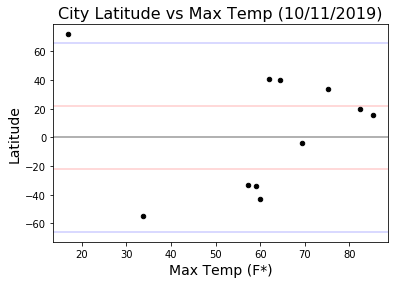

<Figure size 432x288 with 0 Axes>

In [20]:
# create graph, titles, date and save lat vs max temp
colors = []

lat_vs_max_temp = cities_mod2.plot.scatter(x='Max Temp',
                                     y='Lat',
                                     c='k')

#color = 'r' if (group['label'] < 0).all() else 'g'

# add lines representing equator, tropics, arctic and antarctic circles
plt.axhline(y=-66, color='b', linestyle='-', alpha=0.2)
plt.axhline(y=-22, color='r', linestyle='-', alpha=0.2)
equator = plt.axhline(y=0, color='k', linestyle='-', alpha=0.4)
plt.axhline(y=22, color='r', linestyle='-', alpha=0.2)
plt.axhline(y=66, color='b', linestyle='-', alpha=0.2)                                     

# add titles and legend
plt.title('City Latitude vs Max Temp ('+ todaysdate +')', fontsize=16)
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Max Temp (F*)', fontsize=14)

# show
plt.show()

# save figure as png
plt.savefig("Images/lat_vs_max_temp.png")



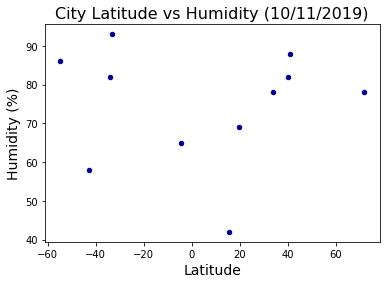

In [21]:
# create graph, titles, date and save lat vs humidity
lat_vs_humidity = cities_mod2.plot.scatter(x='Lat',
                                     y='Humidity',
                                     c='DarkBlue')
                                     
plt.title('City Latitude vs Humidity ('+ todaysdate +')', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.savefig("Images/lat_vs_humidity.png")

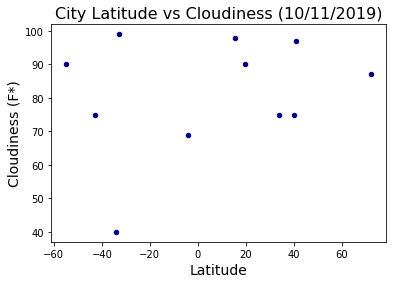

In [22]:
# create graph, titles, date and save lat vs cloudiness
lat_vs_cloudiness = cities_mod2.plot.scatter(x='Lat',
                                     y='Cloudiness',
                                     c='DarkBlue')
                                     
plt.title('City Latitude vs Cloudiness ('+ todaysdate +')', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (F*)', fontsize=14)
plt.savefig("Images/lat_vs_cloudiness.png")

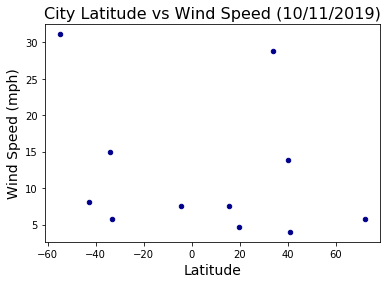

In [23]:
# create graph, titles, date and save lat vs wind speed
lat_vs_wind_speed = cities_mod2.plot.scatter(x='Lat',
                                     y='Wind Speed',
                                     c='DarkBlue')
                                     
plt.title('City Latitude vs Wind Speed ('+ todaysdate +')', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.savefig("Images/lat_vs_wind_speed.png")